# Neural networks and XOR problem

In [1]:
import numpy as np
import random
import math

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import colors
from JSAnimation import IPython_display
%matplotlib inline

from nnvisual import *

Our main functions: sigmoid() is an activation function, forward() implements forward propagation step, backward() implements backpropagation step. The function plot_decision_boundary() draws the decision boundary for two classes. The function train_neural_network() run the main loop of forward and backward propagations.

In [2]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def forward(X, thetas):
    Xb = np.hstack((np.ones((X.shape[0],1)), X))
    a = np.transpose(Xb)
    alist = [a]
    for i in range(L):
        a = sigmoid(np.dot(thetas[i], a))
        if i < L-1:
            a = np.vstack((np.ones((1, a.shape[1])), a))
        alist.append(a)
    return alist

def backward(a, thetas, alpha=0.1, beta=0.01, batch_size=1):
    start = 0
    end = start + batch_size
    while True:
        if end > y.shape[1]:
            end = y.shape[1]
        deltas = a[L][:,start:end] - y[:,start:end] # a[L] are predictions
        for i in range(L-1, -1, -1):
            deltas_prev = np.multiply(np.multiply(np.dot(np.transpose(thetas[i]), deltas), a[i][:,start:end]), 1-a[i][:,start:end])
            step = np.sum(np.array([np.outer(deltas[:,k], a[i][:,start:end][:,k]) for k in range(deltas.shape[1])]), axis=0)
            thetas[i][:,1:] = thetas[i][:,1:] - alpha*step[:,1:] - beta*thetas[i][:,1:]
            thetas[i][:,0] = thetas[i][:,0] - alpha*step[:,0]
            deltas = deltas_prev[1:, :]
        start = end
        end = start + batch_size
        if start == y.shape[1]:
            break
    return thetas

def plot_decision_boundary(thetas, fig, pos):
    x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                         np.linspace(-0.1, 1.1, 200))
    ypred = forward(np.c_[x1.ravel(), x2.ravel()], thetas)[L][0]
    ypred = ypred.reshape(x1.shape)
    extent = -0.1, 1.1, -0.1, 1.1
    
    fig.add_subplot(1,4,pos)
    #plt.imshow(ypred, cmap=cm.bwr, alpha=.9, interpolation='bilinear', extent = extent, origin='lower')
    plt.imshow(ypred, cmap=cm.bwr, alpha=.9, interpolation='bilinear', extent = extent, origin='lower')

def train_neural_network(X, y, alpha, beta, batch_size, seed):
    ### initialize weights
    thetas = []
    np.random.seed(seed)
    for i in range(L):
        thetas.append(20*(np.random.rand(nn[i+1], nn[i]+1)-0.5))
    print 'Thetas:'
    print thetas
    
    ### the main loop of training
    niter = 10000
    fig = plt.figure(figsize=(16,32))
    count_plot = 0
    for it in range(niter):
        a = forward(X, thetas)    
        thetas = backward(a, thetas, alpha=alpha, beta=beta, batch_size=batch_size)
        if it % 2500 == 0:
            count_plot = count_plot + 1
            plot_decision_boundary(thetas, fig, count_plot)
    plt.show() 
    return thetas

def predict_neural_network(X, thetas):
    return forward(X, thetas)[L][0]

Now we try to train the neural network to solve the famous XOR problem.

| $\mathbf{x_1}$ | $\mathbf{x_2}$ | XOR $\mathbf{(x_1, x_2)}$ |
|-------|-------|------------------------|
| 1     | 1     |     1 |
| 1     | 0     |     0 |
| 0     | 1     |     0 |
| 0     | 0     |     1 |

The XOR function detects if $x_1$ and $x_2$ are the same. The known fact is that it is impossible to solve this problem using logistic regression and we need at least one hidden layer to get correct solution. First, we define our dataset: 4 training examples with XOR as a target variable $y$.

In [3]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y = np.array([1, 0, 0, 1]).reshape((1, -1))

Define the neural network configuration (the last number is the dimension of $y$):

In [4]:
nn = np.array([X.shape[1], 2, y.shape[0]]).astype(int)
L = len(nn)-1 # L = number of hidden layers + 1

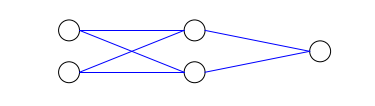

In [7]:
network = NeuralNetwork()
for l in nn:
    network.add_layer(l)
network.draw()

Our main loop forward and backward propagations (we are going to check different initializations and different parameters:

Thetas:
[array([[ 1.67236953,  7.19523078,  2.85081229],
       [-8.56741528,  0.63708182,  8.25788355]]), array([[ 5.62926985,  5.52618743,  5.01061296]])]


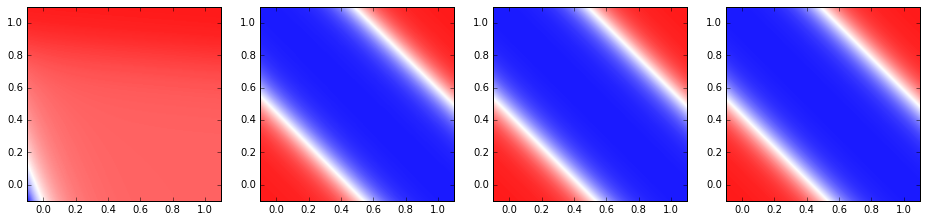

Predictions:


array([ 0.97663021,  0.02344909,  0.0234481 ,  0.97639398])

In [5]:
thetas = train_neural_network(X, y, alpha=0.1, beta=0.0001, batch_size=2, seed=131214)
print "Predictions:"
predict_neural_network(X, thetas)

Here the influence of the learning rate alpha. We can see that our neural network cannot find the correct minimum with big learning rate. Notice that in this case all predictions are very close to each other.

Thetas:
[array([[ 1.67236953,  7.19523078,  2.85081229],
       [-8.56741528,  0.63708182,  8.25788355]]), array([[ 5.62926985,  5.52618743,  5.01061296]])]


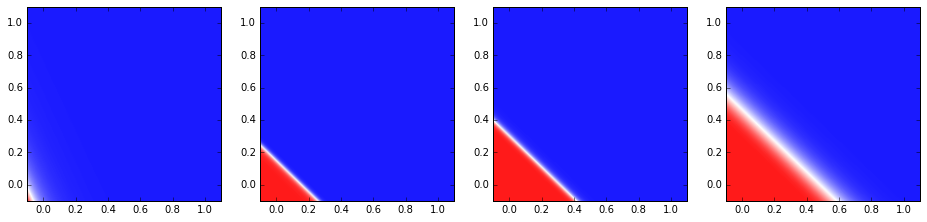

Predictions:


array([ 0.999996,  0.999996,  0.999996,  1.      ])

In [6]:
thetas = train_neural_network(X, y, alpha=10.0, beta=0.0001, batch_size=2, seed=131214)
print "Predictions:"
predict_neural_network(X, thetas)

The initialization weights are also very important. The different seed can give different results:

Thetas:
[array([[-6.96736066,  7.37490561,  8.51767526],
       [-0.23173645,  5.30985877, -2.76355142]]), array([[-7.335906  ,  0.43388152,  4.42122827]])]


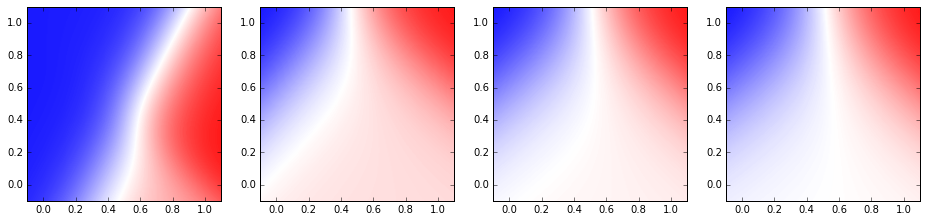

Predictions:


array([ 0.8485083 ,  0.52529168,  0.15702184,  0.46377799])

In [782]:
thetas = train_neural_network(X, y, alpha=0.01, beta=0.0001, batch_size=2, seed=114)
print "Predictions:"
predict_neural_network(X, thetas)

The regularization parameter beta is also important. For wrong values of beta the neural network can fail as well:

Thetas:
[array([[ 1.67236953,  7.19523078,  2.85081229],
       [-8.56741528,  0.63708182,  8.25788355]]), array([[ 5.62926985,  5.52618743,  5.01061296]])]


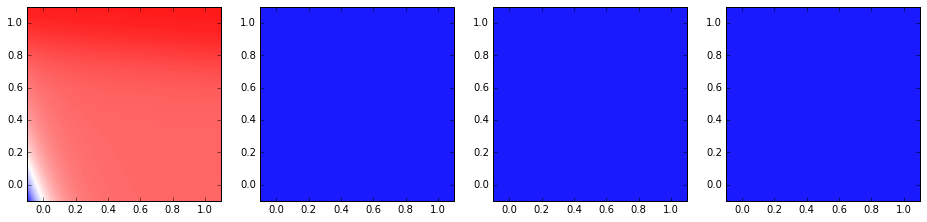

Predictions:


array([ 0.5,  0.5,  0.5,  0.5])

In [785]:
thetas = train_neural_network(X, y, alpha=0.1, beta=0.01, batch_size=2, seed=131214)
print "Predictions:"
predict_neural_network(X, thetas)